In [3]:
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt

In [2]:
N = 40 #앨리스의 디자인 A안 표시 횟수
a = 2 #앨리스 A안 클릭 횟수

with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=1) # Uniform : 균일분포를 나타내는 클래스. lower와 upper는 확률 변수 범위.
    obs = pm.Binomial('a', p=theta, n=N, observed=a)  # 가능도 함수. 이항분포이므로 pm.Binomial 클래스로 이를 표현. 성공확률 p, 시행횟수 n. observed에 관측데이터 a를 전달.
    trace = pm.sample(5000, chains=2, cores=1) #추론 진행. 추출할 샘플 수를 5000으로 지정. chains는 병행해 일련의 샘플링 수행 홋수를 지정. 그래서 5000 X 2 = 10000개의 샘플 얻음.

<ipython-input-2-1c0030568e8a>:7: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, chains=2, cores=1) #추론 진행. 추출할 샘플 수를 5000으로 지정. chains는 병행해 일련의 샘플링 수행 홋수를 지정. 그래서 5000 X 2 = 10000개의 샘플 얻음.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 16 seconds.


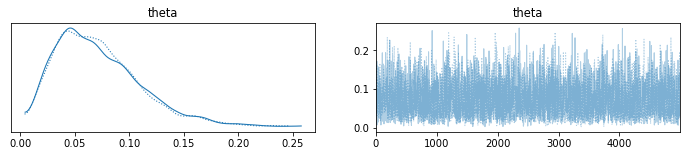

In [4]:
from arviz.utils import Numba
Numba.disable_numba()
Numba.numba_flag

with model:
    pm.plot_trace(trace)

In [5]:
with model:
    print(pm.summary(trace, hdi_prob=0.95))

        mean    sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
theta  0.072  0.04     0.009      0.151      0.001      0.0    4141.0   

       ess_tail  r_hat  
theta    5292.0    1.0  


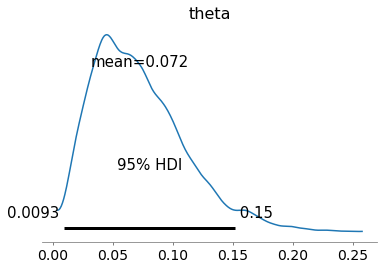

In [6]:
with model:
    pm.plot_posterior(trace, hdi_prob=0.95)

In [7]:
# 가설: 앨리스 디자인 A안의 클릭률은 1%이상이다

print((trace['theta'] - 0.01 > 0).mean())  #이 확률이 95%이상이면 가설 수용

0.9936


In [8]:
#앨리스 디자인 B안

with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
    obs = pm.Binomial('obs', p=theta, n=[40, 50], observed=[2,4]) # A안과 B안 데이터 동시에 전달
    trace = pm.sample(5000, chains=2)

<ipython-input-8-59c13e6dfd38>:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 23 seconds.


<ipython-input-9-a4b60b642d2f>:2: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, ['theta'], compact=True)


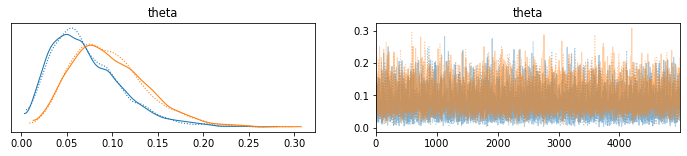

In [9]:
with model:
    pm.traceplot(trace, ['theta'], compact=True)

In [10]:
# 가설 : 디자인 B안의 클릭률은 디자인 A안의 클릭률보다 높다
# 정략적 평가 : B안 클릭률 추정치에서 A안 클릭률 추정치를 뺀 값이 95%의 확률로 양수가 된다

print((trace['theta'][:, 1] - trace['theta'][:, 0] > 0).mean())

0.6764


<ipython-input-11-2465d166adfa>:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 22 seconds.


0.9994


<ipython-input-11-2465d166adfa>:8: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, ['theta'], compact=True)


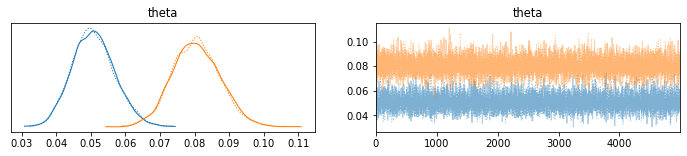

In [11]:
#밥의 보고서 A안과 B안 클릭률 비교

with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=1, shape=2)
    obs = pm.Binomial('obs', p=theta, n=[1280, 1600], observed=[64, 128])
    trace = pm.sample(5000, chains=2)
    print((trace['theta'][:, 0] < trace['theta'][:, 1]).mean())
    pm.traceplot(trace, ['theta'], compact=True)

C:\Users\user\anaconda3\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
<ipython-input-12-e0ece4014f46>:20: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_a = pm.sample(5000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 312 seconds.
<ipython-input-12-e0ece4014f46>:21: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_a)


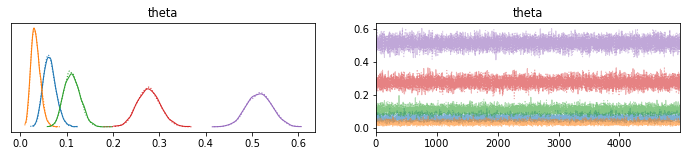

In [12]:
# 진정한 리뷰 점수

# 디리클레 분포 Dirichlet distribution 
# - 연속 확률 분포의 하나. K차원 벡터 확률 변수 theta가 따르는 확률 분포.
# - 단 theta의 각 요소는 0 이상 1 이하의 값이고 그 합은 1이 된다. 즉, 디리클레 분포를 따르는 확률 변수 자체가 확률 질량 함수의 조건을 만족.
# - 집중도라고 불라는 K차원 벡터 alpha를 파라미터로 가지고, 각 요소는 양으 ㅣ실수로 표현됨.
# - 또한 이 집중도 파라미터의 값이 모두 1일때 여러 카테고리의 균일 분포에 해당함.
# - 여기서는 이 디리클레 분포를 사전 분포에 이용함.

n_a = [20, 10, 36, 91, 170] #각 점수를 매긴 리뷰어의 수
data = [0 for _ in range(n_a[0])]
data += [1 for _ in range(n_a[1])]
data += [2 for _ in range(n_a[2])]
data += [3 for _ in range(n_a[3])]
data += [4 for _ in range(n_a[4])]

with pm.Model() as model_a:
    theta = pm.Dirichlet('theta', a=np.array([1, 1, 1, 1, 1])) #사전분포에 디리클레 분포
    obs = pm.Categorical('obs', p=theta, observed=data) #가능도 함수에 카테고리 분포
    trace_a = pm.sample(5000, chains=2)
    pm.traceplot(trace_a)

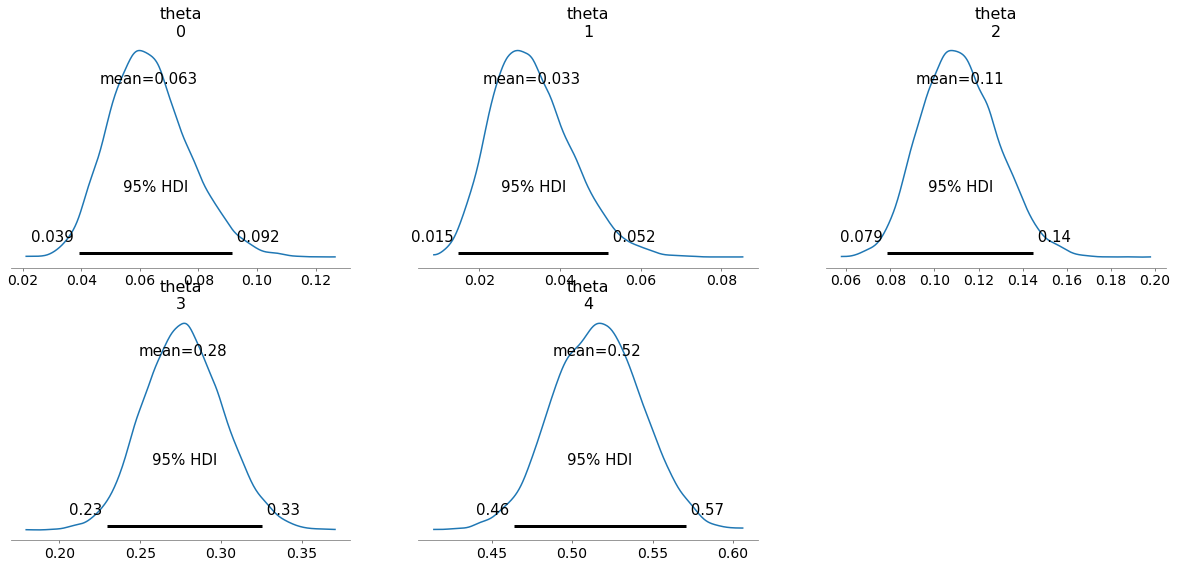

In [13]:
with model_a:
    pm.plot_posterior(trace_a, hdi_prob=0.95)

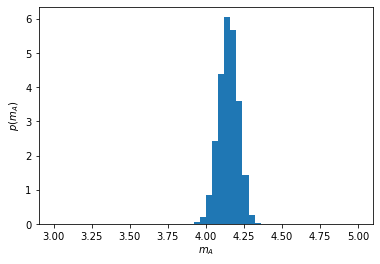

In [16]:
#평균 점수 변수 도입
#확률 변수 m : 각 리뷰 점수를 해딩 점수가 발생할 확률의 가중치로 가중 평균
# 리뷰 점수를 weights로 정의하고, 확률 theta를 곱한 합을 얻게 함

weights = np.array([1, 2, 3, 4, 5])
m_a = [sum(row * weights) for row in trace_a['theta']]
# m_a = np.matmul(trace_a['theta', weights])

plt.hist(m_a, range=(3, 5), bins=50, density=True)
plt.xlabel(r'$m_A$')
plt.ylabel(r'$p(m_A)$')
plt.show()

<ipython-input-19-47be311c0458>:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_b = pm.sample(5000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 123 seconds.
<ipython-input-19-47be311c0458>:7: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace_b)


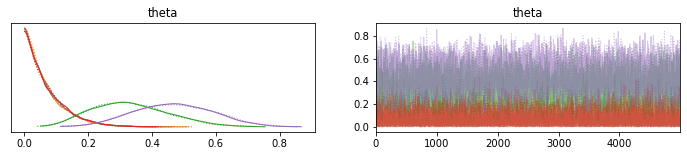

In [19]:
n_b = np.array([0, 0, 4, 0, 6])

with pm.Model() as model_b:
    theta = pm.Dirichlet('theta', a=np.array([1,1,1,1,1]))
    obs = pm.Multinomial('obs', p=theta, n=n_b.sum(), observed=n_b)
    trace_b = pm.sample(5000, chains=2)
    pm.traceplot(trace_b)

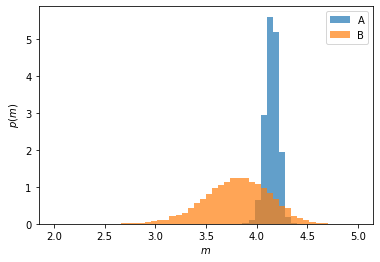

In [20]:
m_b = [sum(row * weights) for row in trace_b['theta']]
plt.hist(m_a, range=(2, 5), bins=50, density=True, label='A', alpha=0.7)
plt.hist(m_b, range=(2, 5), bins=50, density=True, label='B', alpha=0.7)
plt.xlabel(r'$m$')
plt.ylabel(r'$p(m)$')
plt.legend()
plt.show()

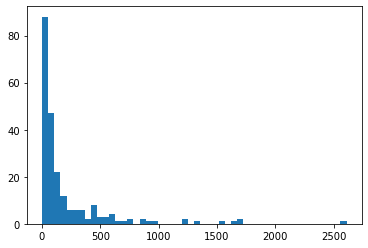

In [21]:
# 체류 시간 테스트하기
# 연속값으로 표현되는 지표에 대한 가설검정 : 지수분포를 가능도 함수로 이용.
# 사용자가 웹사이트로부터 이탈하는 것을 매추마다 일정한 확률로 발생하는 이벤트라고 생각 -> 체류시간은 그 이벤트의 시간 간격.

import urllib

url = 'https://www.oreilly.co.jp/pub/9784873119168/data/time-on-page.csv'
response = urllib.request.urlopen(url)
data = [int(row.strip()) for row in response.readlines()]
plt.hist(data, bins=50)
plt.show()


<ipython-input-22-de394347fb15>:4: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [theta]


Sampling 2 chains for 1_000 tune and 5_000 draw iterations (2_000 + 10_000 draws total) took 137 seconds.
<ipython-input-22-de394347fb15>:5: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)


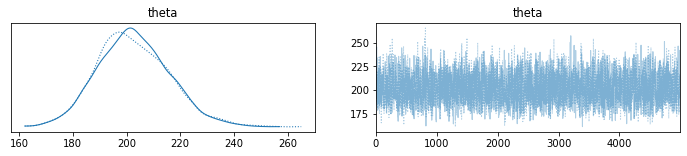

In [22]:
with pm.Model() as model:
    theta = pm.Uniform('theta', lower=0, upper=3000)
    obs = pm.Exponential('obs', lam=1/theta, observed=data) 
    trace = pm.sample(5000, chains=2)
    pm.traceplot(trace)

In [ ]:
# 어떤 조작을 함으로써 체류 시간이 증가하는 것을 확인하고자 한다면 이 확률 변수 theta의 사후 분포에서 도출할 수 있는 통게량을 비교해서 정량적 평가를 수행.
with model:
    pm.plot_posterior(trace, hdi_prob=0.95)